# Knock airport Weather

From the data set of the following link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv This program plot:
- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed (considering there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)


In [14]:
# Import pandas library
import pandas as pd

In [15]:
# Import matplotlib.pyplot library
import matplotlib.pyplot as plt

In [16]:
import datetime as dt
print(dir(dt))

['MAXYEAR', 'MINYEAR', 'UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'time', 'timedelta', 'timezone', 'tzinfo']


As the csv file has 23 lines that are not common in a csv file and this cause issues, we can 'ignore' them, with the "skip" method:
Source: https://www.geeksforgeeks.org/python/how-to-skip-rows-while-reading-csv-file-using-pandas/

In [17]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

df = pd.read_csv(url, skiprows=range(0, 23))  # don't take in consideration the first 20 lines
df.head()

C:\Users\tanya\AppData\Local\Temp\ipykernel_9476\2468379064.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=range(0, 23))  # don't take in consideration the first 20 lines


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [18]:
# As date is in text format, we need to convert it to datetime format
# source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
print(df.head())

C:\Users\tanya\AppData\Local\Temp\ipykernel_9476\3415753099.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


                 date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0 1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1 1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2 1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3 1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4 1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


## Plot the tempeture
We need to import matplotlib to create the plotes.

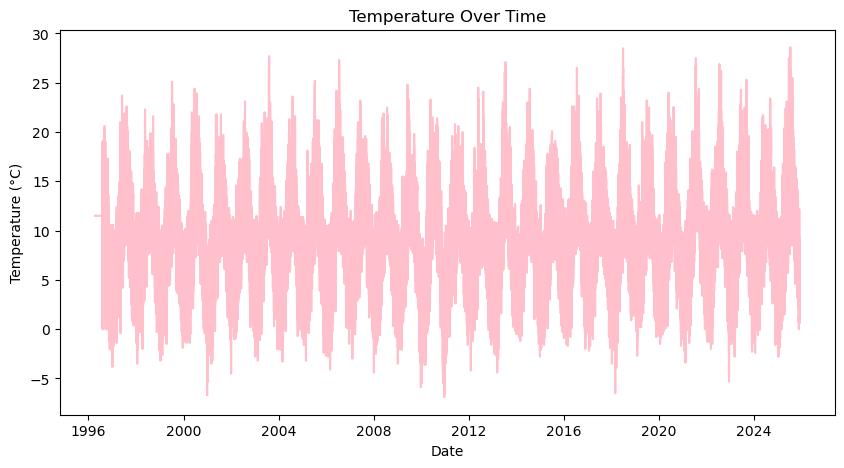

In [ ]:
# create a plot of temperature over time

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temp'], color ='pink', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.show()

## Plot the mean temperature each day
To plot we need to calculate daily mean.

In [ ]:
# Calculate daily mean temperature
df_daily = df.groupby(df['date'].dt.date)['temp'].mean()
print(df_daily)

date
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Name: temp, Length: 10717, dtype: float64


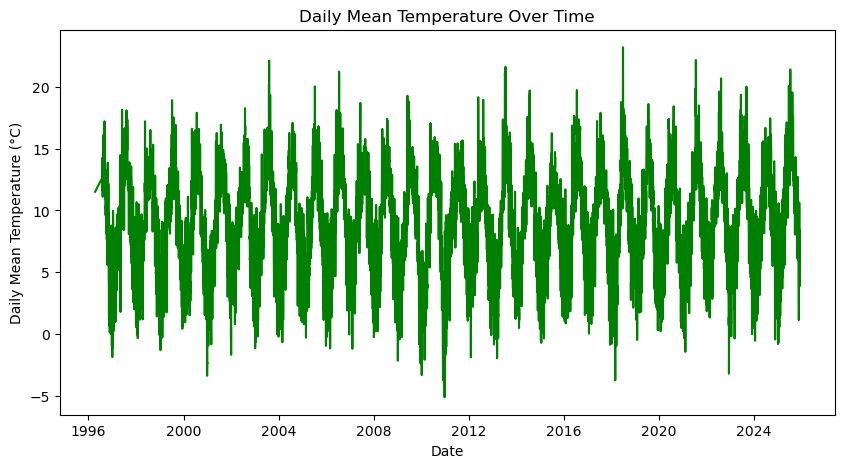

In [31]:
# plot daily mean temperature
plt.figure(figsize=(10, 5))
df_daily.plot(color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Daily Mean Temperature (°C)')
plt.title('Daily Mean Temperature Over Time')
plt.show()

## Plot the mean temperature for each month
To plot we need to calculate monthly mean.

In [24]:
# Calculate the monthly mean temperature
df_monthly = df.groupby(df['date'].dt.to_period('M'))['temp'].mean()
print(df_monthly)

date
1996-04    11.500000
1996-07    12.650000
1996-08    12.946909
1996-09    12.174306
1996-10     9.614113
             ...    
2025-08    15.178495
2025-09    11.368056
2025-10     9.900134
2025-11     7.153889
2025-12     8.400000
Freq: M, Name: temp, Length: 355, dtype: float64


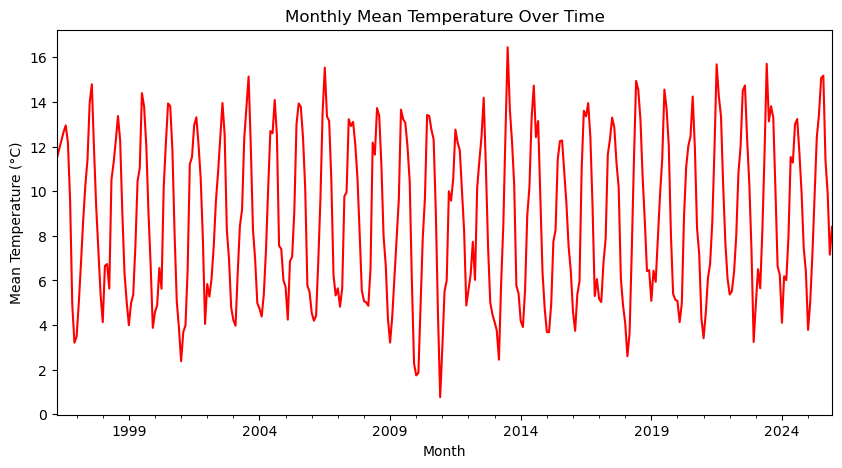

In [32]:
# Plot monthly mean temperature
plt.figure(figsize=(10, 5))
df_monthly.plot(color='red', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Mean Temperature Over Time')
plt.show()

## Plot The Windspeed 
Considering there is missing data in the windspeed column, the appropriate thing to do before the plot is to use understand we can do/treat the missing data.
- We can delete the missing rows,
- To add some values in that missing data, like the an avarage or maybe to put 0
- Ignore the missing values.

We will ignore the missing values, to not 'contaminate' the dataset.

In [34]:
# Convert 'wdsp' column to numeric, forcing errors to NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
print(df['wdsp'])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
257149    17.0
257150    14.0
257151    10.0
257152     6.0
257153     8.0
Name: wdsp, Length: 257154, dtype: float64


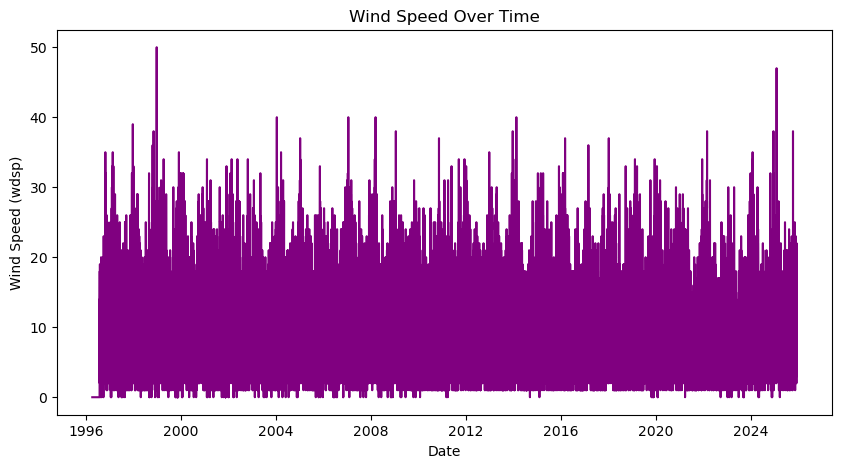

In [35]:
# Plot the wind speed over time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['wdsp'], color='purple', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Wind Speed (wdsp)')
plt.title('Wind Speed Over Time')
plt.show()

## The rolling windspeed (over 24 hours)
To plot the rolling windspeed over 24 hours, we first need to ensure the data is sorted by date.

In [36]:
df = df.sort_values('date')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.sort_values('date')

# Convert 'wdsp' column to numeric, forcing errors to NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [ ]:
#Calculating rolling windspeed over 24 hours
df.set_index('date', inplace=True)
rolling_windspeed = df['wdsp'].rolling(window=24).mean()
print(rolling_windspeed.head())

date
1996-04-10 14:00:00   NaN
1996-07-31 08:00:00   NaN
1996-07-31 09:00:00   NaN
1996-07-31 10:00:00   NaN
1996-07-31 11:00:00   NaN
Name: wdsp, dtype: float64


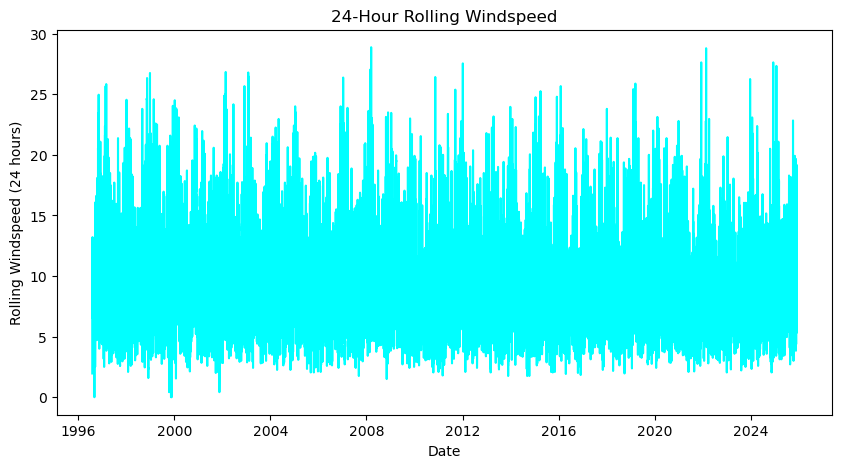

In [38]:
# plot rolling windspeed
plt.figure(figsize=(10, 5))
plt.plot(rolling_windspeed.index, rolling_windspeed, color='cyan')
plt.xlabel('Date')
plt.ylabel('Rolling Windspeed (24 hours)')
plt.title('24-Hour Rolling Windspeed')
plt.show()

## Plot the max windspeed for each day
First we need to create a column only with the date, without the hours and then to group per day and get the max windspeed per day.

In [39]:
# Create a column with date only (without time)
df['date_only'] = df.index.date
print(df['date_only'].head())

date
1996-04-10 14:00:00    1996-04-10
1996-07-31 08:00:00    1996-07-31
1996-07-31 09:00:00    1996-07-31
1996-07-31 10:00:00    1996-07-31
1996-07-31 11:00:00    1996-07-31
Name: date_only, dtype: object


In [40]:
# group by date only and calculate max windspeed
daily_mean_windspeed = df.groupby('date_only')['wdsp'].max()